Feedback dari anda diperlukan! bantu kami dalam [meningkatkan modul ini](https://forms.gle/pWJd6y4hY4KWMcno6).

In [1]:
warning('off','all');
pkg load symbolic

In [2]:
syms y(t);

Symbolic pkg v2.8.0: Python communication link active, SymPy v1.4.


# Penyelesaian Persamaan Diferensial

MATLAB PDE Solver dan ODE Solver dapat digunakan untuk menyelesaikan (sistem) persamaan diferensial baik dalam bentuk PDE maupun ODE. Tentu, tidak semuanya dapat diselesaikan secara simbolik, karena itu ada baiknya untuk mengecek dokumentasi pada MATLAB tentang jenis solver yang bagus untuk menyelesaikan problem yang anda hadapi. Kali ini, kita akan menggunakan `dsolve` untuk menyelesaikan secara simbolik ODE $$y'(t) = \frac{1}{2} (y(t)-t)$$

pada interval $0 \leq t \leq 4$ dan nilai awal $y(0)=1$.

In [3]:
% Definisikan fungsi simbolik
syms y(t);

% IVP
cond = y(0) == 1;
ode = diff(y, t) == (y-t)/2

ode = (sym)

  d            t   y(t)
  ──(y(t)) = - ─ + ────
  dt           2    2  



Selanjutnya, untuk mencari solusi analitik dan plot fungsi pada interval $[0, 4]$ kita lakukan

ySol(t) = (symfun)

         ⎛         -t     ⎞  t
         ⎜         ───    ⎟  ─
         ⎜          2     ⎟  2
  y(t) = ⎝(t + 2)⋅ℯ    - 1⎠⋅ℯ 

Waiting.....


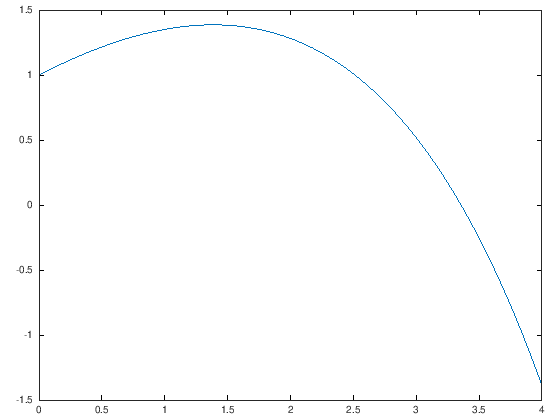

In [4]:
ySol(t) = dsolve(ode, cond)

x = linspace(0, 4);
ysol = ySol(x);
ysol = double(rhs(ysol));   % mungkin tidak diperlukan di MATLAB
plot(x, ysol)

## Masalah Nilai Awal (Initial Value Problem)

Tidak semua permasalahan dapat diselesaikan secara analitik, atau setidaknya secara simbolik menggunakan program komputer. Kali ini, kita akan menggunakan beberapa metode numerik untuk menyelesaikan IVP di awal. Untuk itu, kita akan menggunakan beberapa variabel dibawah ini dalam kode-kode kita selanjutnya.

In [5]:
% Inisialisasi
a = 0;
b = 4;
h = 0.2;
interval = ceil((b-a)/h);

f = @(t, y) (y-t)/2;   % y' = f(t, y) = (t-y)/2

### Single-Step Method

#### Euler

In [6]:
% IVP
t = a;
y = zeros(1, interval+1);
y(1) = 1;

% Algoritma
for i = 1:interval
    t = t + h;
    y(i+1) = y(i) + h * f(t, y(i));
end

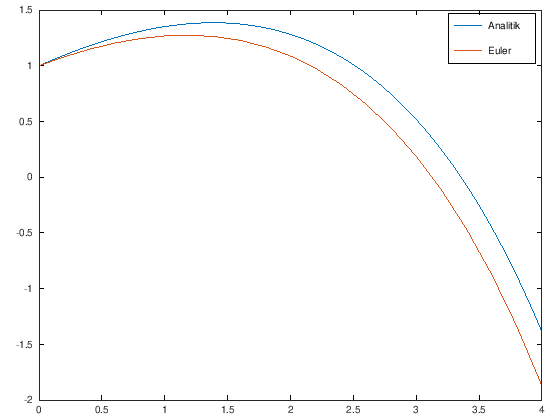

In [7]:
plot(x, ysol)
hold on
plot(a:h:b, y)
legend('Analitik', 'Euler')

#### Heun

In [8]:
% IVP
t = a;
y = zeros(1, interval+1);
y(1) = 1;

% Algoritma
for i = 1:interval
    P = y(i) + h * f(t, y(i));
    t = t+h;
    y(i+1) = y(i) + h/2 * (f(t-h, y(i)) + f(t, P));
end

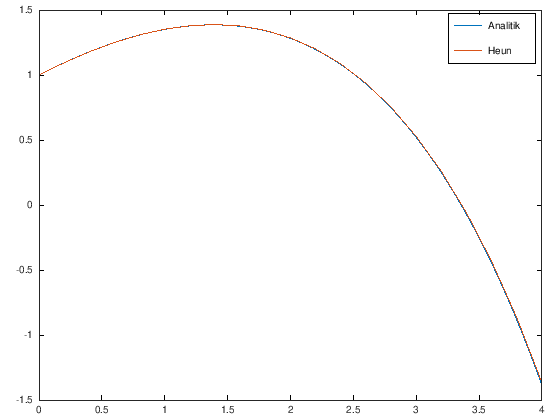

In [9]:
plot(x, ysol)
hold on
plot(a:h:b, y)
legend('Analitik', 'Heun')

#### Taylor

#### Runge-Kutta Orde 2

In [10]:
% IVP
t = a;
y = zeros(1, interval+1);
y(1) = 1;

% Algoritma
for i = 1:interval
    K1 = h * f(t  , y(i));
    K2 = h * f(t+h, y(i) + K1);

    y(i+1) = y(i) + (K1 + K2)/2;
    t = t + h;
end

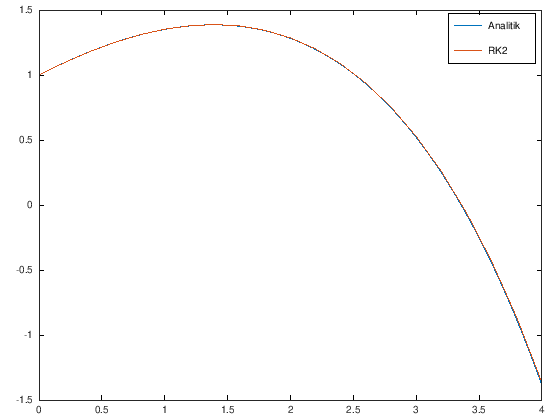

In [11]:
plot(x, ysol)
hold on
plot(a:h:b, y)
legend('Analitik', 'RK2')

#### Runge-Kutta Orde 4

In [12]:
% IVP
t = a;
y = zeros(1, interval+1);
y(1) = 1;

% Algoritma
for i = 1:interval
    K1 = h * f(t    , y(i)       );
    K2 = h * f(t+h/2, y(i) + K1/2);
    K3 = h * f(t+h/2, y(i) + K2/2);
    K4 = h * f(t+h  , y(i) + K3  );    

    y(i+1) = y(i) + (K1 + 2*K2 + 2*K3 + K4)/6;
    t = t + h;
end

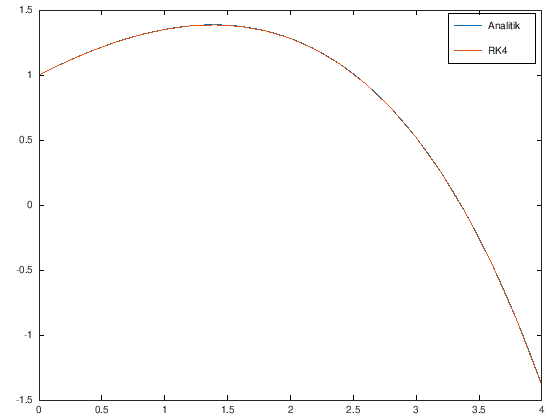

In [13]:
plot(x, ysol)
hold on
plot(a:h:b, y)
legend('Analitik', 'RK4')

### Predictor-Corrector Method

#### Adam-Bashfort-Moulton

In [14]:
% IVP
t = a;
y = zeros(1, interval+1);
y(1) = 1;

% Teknik untuk inisialisasi: Heun
for i = 1:3
    Z = y(i) + h * f(t, y(i));
    t = t+h;
    y(i+1) = y(i) + h/2 * (f(t-h, y(i)) + f(t, Z));
end

% Algoritma
for i = 4:interval
    P = y(i) + h/24 * (-  9*f(t-3*h, y(i-3)) ...
                       + 37*f(t-2*h, y(i-2)) ...
                       - 59*f(t  -h, y(i-1)) ...
                       + 55*f(t    , y(i  ))  );

    y(i+1) = y(i) + h/24 * (     f(t-2*h, y(i-2)) ...
                            -  5*f(t-  h, y(i-1)) ...
                            + 19*f(t    , y(i  )) ...
                            +  9*f(t+  h, P     )  );


    t = t+h;
end

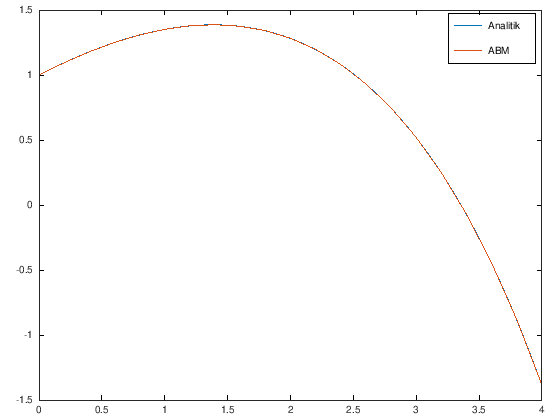

In [15]:
plot(x, ysol)
hold on
plot(a:h:b, y)
legend('Analitik', 'ABM')

#### Milne-Simpson

In [16]:
% IVP
t = a;
y = zeros(1, interval+1);
y(1) = 1;

% Teknik untuk inisialisasi: Heun
for i = 1:3
    Z = y(i) + h * f(t, y(i));
    t = t+h;
    y(i+1) = y(i) + h/2 * (f(t-h, y(i)) + f(t, Z));
end


% Algoritma
for i = 4:interval
    P = y(i-3) + 4*h/3 * (  2*f(t-2*h, y(i-2)) ...
                          -   f(t-  h, y(i-1)) ...
                          + 2*f(t    , y(i  ))  );

    y(i+1) = y(i-1) + h/3 * (    f(t-  h, y(i-1)) ...
                             + 4*f(t    , y(i  )) ...
                             +   f(t+  h, P     )  );

    t = t+h;
end

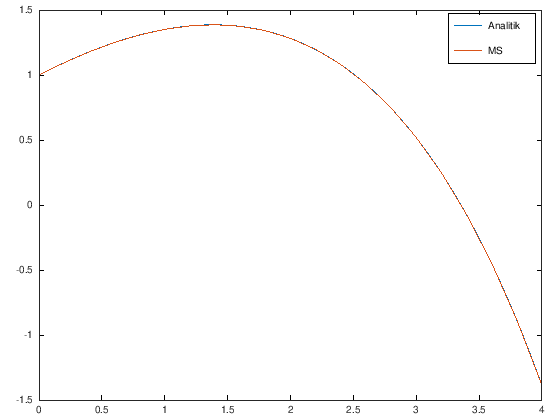

In [17]:
plot(x, ysol)
hold on
plot(a:h:b, y)
legend('Analitik', 'MS')

#### Hamming

In [18]:
% IVP
t = a;
y = zeros(1, interval+1);
y(1) = 1;

% Teknik untuk inisialisasi: Heun
for i = 1:3
    Z = y(i) + h * f(t, y(i));
    t = t+h;
    y(i+1) = y(i) + h/2 * (f(t-h, y(i)) + f(t, Z));
end


% Algoritma
for i = 4:interval
    P = y(i-3) + 4*h/3 * (  2*f(t-2*h, y(i-2)) ...
                          -   f(t-  h, y(i-1)) ...
                          + 2*f(t    , y(i  ))  );

    y(i+1) = (-y(i-2) + 9*y(i))/8 + 3*h/8 * (-   f(t-  h, y(i-1)) ...
                                             + 2*f(t    , y(i  )) ...
                                             +   f(t+  h, P     )  );

    t = t+h;
end

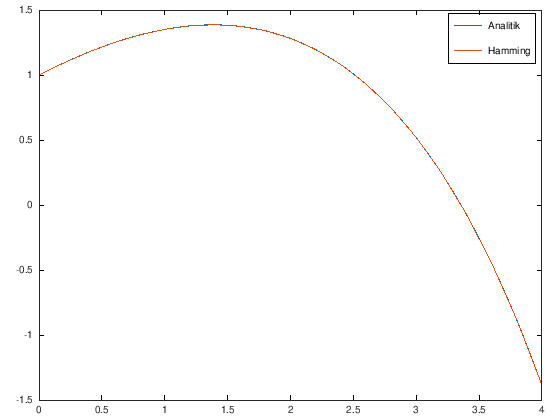

In [19]:
plot(x, ysol)
hold on
plot(a:h:b, y)
legend('Analitik', 'Hamming')

### Sistem Persamaan Diferensial

fungsi `dsolve` pada MATLAB juga dapat digunakan untuk menyelesaikan sistem ODE dalam beberapa variabel. Namun, jika hal ini tidak dapat dilakukan, MATLAB menyediakan [dokumentasi cara menyelesaikan sistem secara numerik](https://www.mathworks.com/help/symbolic/solve-differential-equation-numerically-1.html).

Sekarang kita akan menyelesaikan sistem persamaan diferensial
$$
\begin{align}
\frac{dx}{dt} &= x + 2y + 1 \\
\frac{dy}{dt} &= -x + y + t \\
\end{align}
$$
di selang $[0, 4]$, dengan kondisi awal $x(0)=2$ dan $y(0)=-1$.

*fungsi* `dsolve` *juga dapat digunakan untuk menyelesaikan sistem dalam bentuk matriks, namun saya tidak membahas hal itu disini. (caranya mirip kok)*

In [20]:
% Definisikan fungsi simbolik
syms x(t) y(t);

% IVP
ode1 = diff(x, t) ==  x + 2*y + 1;
ode2 = diff(y, t) == -x +   y + t;
odes = [ode1; ode2];

cond1 = x(0) ==  2;
cond2 = y(0) == -1;
conds = [cond1; cond2];

% simpan solusi sistem ke fungsi xsol(t) dan ysol(t)
%% [xSol(t), ySol(t)] = dsolve(odes, conds);

% plot solusi
%% fplot(xSol, ySol, [0, 4])
%% grid on

% sayang, Octave di laptop saya ngga
% support secara penuh kode MATLAB ini. :/
% kalau mau coba di MATLAB, tinggal hilangkan '%%' aja kok :)

Banyak metode yang kita bahas untuk solusi IVP dapat diperluas untuk menyelesaikan IVP dalam bentuk sistem persamaan. Kali ini kita akan membahas perluasan dari dua metode: Euler, dan Runge-Kutta. Untuk itu, kita akan menggunakan beberapa variabel dibawah ini dalam pembahasan kita selanjutnya.

In [21]:
% Inisialisasi
a = 0;
b = 4;
h = 0.05;
interval = ceil((b-a)/h);

f = @(t, x, y)   x + 2*y + 1;
g = @(t, x, y)  -x +   y + t;

#### Euler

In [22]:
x = zeros(1, interval+1);
y = zeros(1, interval+1);

% IVP
t = a;
x(1) = 1;
y(1) = 1;

% Algoritma
for i = 1:interval
    t = t + h;
    x(i+1) = x(i) + h * f(t, x(i), y(i));
    y(i+1) = y(i) + h * g(t, x(i), y(i));
end

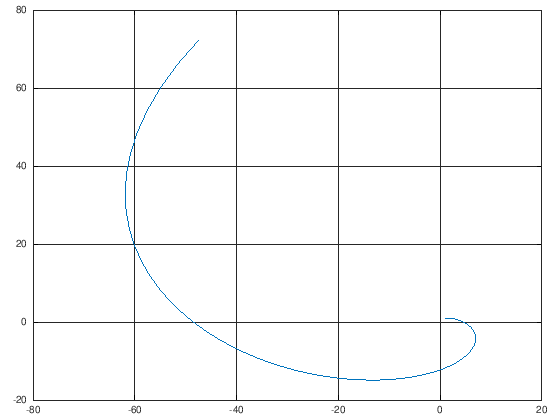

In [23]:
plot(x, y)
grid on

#### Runge Kutta Orde 4

In [24]:
x = zeros(1, interval+1);
y = zeros(1, interval+1);

% IVP
t = a;
x(1) = 1;
y(1) = 1;

% Program
for i = 1:interval
    K1 = h * f(t      , x(i)       , y(i)       );
    L1 = h * g(t      , x(i)       , y(i)       );
    
    K2 = h * f(t + h/2, x(i) + K1/2, y(i) + L1/2);
    L2 = h * g(t + h/2, x(i) + K1/2, y(i) + L1/2);
    
    K3 = h * f(t + h/2, x(i) + K2/2, y(i) + L2/2);
    L3 = h * g(t + h/2, x(i) + K2/2, y(i) + L2/2);
    
    K4 = h * f(t + h  , x(i) + K3  , y(i) + L3  );
    L4 = h * g(t + h  , x(i) + K3  , y(i) + L3  );
  
    x(i+1) = x(i) + (K1 + 2*K2 + 2*K3 + K4)/6;
    y(i+1) = y(i) + (L1 + 2*L2 + 2*L3 + L4)/6;
    t = t + h;
end

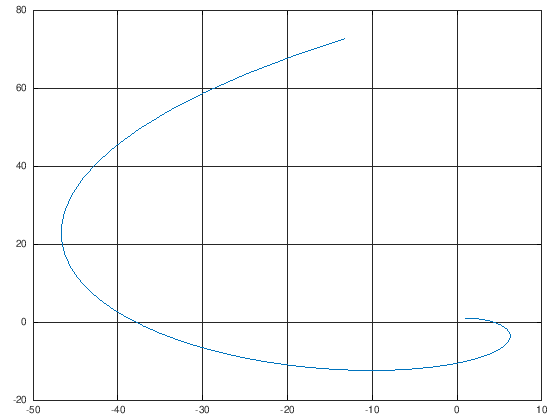

In [25]:
plot(x, y)
grid on

## Masalah Nilai Batas (Boundary Value Problem)

Selesaikan
$$y'' = -y + t$$
pada selang $[0, 30]$, dengan $y(0)=0$ dan $y(10)=5$. Baca dokumentasinya MATLAB, tidak mengerti benar :/. Solusi analitik dari BVP diatas adalah

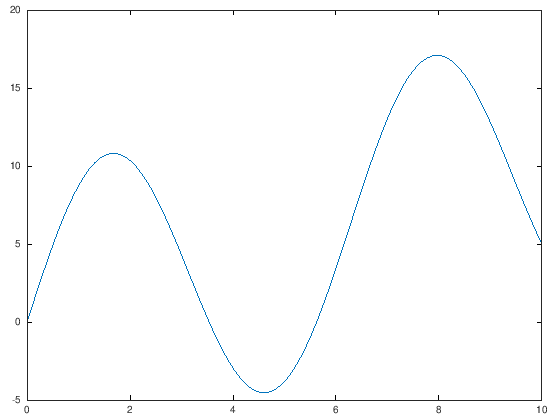

In [26]:
xSol = @(t) t - (5*sin(t))/sin(10);

time = linspace(0, 10);
plot(time, xSol(time))

#### Tebakan Linear

#### Beda Hingga

Misalkan kita memiliki BVP $$x'' = p(t)x' + q(t)x + r(t)$$ di $a\leq t \leq b$ dengan fungsi $x$ bergantung pada $t$ dan memenuhi nilai batas $x(a) = \alpha$ dan $x(b) = \beta$

Dengan menggunakan rumus beda pusat, kita dapat menghampiri diferensial dari fungsi $x(t)$, yakni
$$x'(t) = \frac{1}{2h} \Big( x(t_{j+1} - x(t_{j-1}) \Big) + O(h^2)$$
dan
$$x''(t) = \frac{1}{h^2} \Big( x(t_{j+1} - 2x(t_{j}) + x(t_{j-1}) \Big) + O(h^2)$$

Menyubstitusi hampiran ini ke solusi diferensial awal, menggunakan $p_j = p(t_j)$, $q_j = q(t_j)$, $r_j = r(t_j)$, dan menyusunnya ke dalam bentuk matriks (tridiagonal), kita dapatkan

$$
\begin{bmatrix}
2 + h^2q_1 && \frac{h}{2}p_1 − 1 \\
-\frac{h}{2}p_2 − 1 && 2 + h^2q_2 && \frac{h}{2}p_2 − 1\\
&& \ddots && \ddots && \ddots &&\\
&& && -\frac{h}{2}p_{n-2} − 1 && 2 + h^2q_{n-2} && \frac{h}{2}p_{n-2} − 1\\
&& && && -\frac{h}{2}p_{n-1} − 1 && 2 + h^2q_{n-1}\\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_{n-2} \\
x_{n-1} \\
\end{bmatrix}
= -h^2 
\begin{bmatrix}
r_1 \\
r_2 \\
\vdots \\
r_{n-2} \\
r_{n-1} \\
\end{bmatrix}
-
\begin{bmatrix}
\alpha \Big( \frac{h}{2}p_1 + 1 \Big) \\
0 \\
\vdots \\
0 \\
\beta \Big( \frac{h}{2}p_{n-1} - 1 \Big) \\
\end{bmatrix}
$$


atau secara lebih ringkas,

$$
\begin{bmatrix}
d_1 && e_1 \\
c_2 && d_2 && e_2\\
&& \ddots && \ddots && \ddots &&\\
&& && c_{n-2} && d_{n-2} && e_{n-2}\\
&& && && c_{n-1} && d_{n-1}\\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_{n-2} \\
x_{n-1} \\
\end{bmatrix}
= 
\begin{bmatrix}
f_1 \\
f_2 \\
\vdots \\
f_{n-2} \\
f_{n-1} \\
\end{bmatrix}
-
\begin{bmatrix}
\alpha c_1 \\
0 \\
\vdots \\
0 \\
\beta c_{n-1} \\
\end{bmatrix}
$$


dengan
$$
\begin{align}
c_j &= -1 - \frac{1}{2}hp_j\\
d_j &= 2 + h^2q_j\\
e_j &= -1 + \frac{1}{2}hp_j\\
f_j &= - h^2r_j\\
\end{align}
$$

Hal ini dapat diselesaikan dengan menggunakan teknik penyelesaian matriks. Pada kasus kita, permasalahan BVP dapat kita inisialisasikan ke dalam bentuk berikut

In [27]:
% Inisialisasi interval
interval = 50;

a = 0;
b = 10;
h = (b-a)/interval;

% persamaan differensial setara dengan y'' = -y + t
% bentuk fungsi p(t), q(t), dan r(t)
p = @(t) 0;
q = @(t) -1;
r = @(t) t;

% kondisi batas
alpha = 0;
beta  = 5;

% untuk mengurangi clutter rumus
c = @(idx) -(1 + 0.5*h*p(a + h*idx));
d = @(idx)   2 + h^2  *q(a + h*idx);
e = @(idx) - 1 + 0.5*h*p(a + h*idx);
f = @(idx)     - h^2  *r(a + h*idx);

In [28]:
% Matriks.
% Solusi dari permasalahan ini dapat dilakukan oleh metode
% numerik yang diperkenalkan di Bab 2. Namun, kali ini kita
% hanya akan berfokus pada metode BVP ini saja.

A = zeros(interval-1);
B = zeros(interval-1, 1);

for idx = 1:(interval-2)
    A(idx, idx)   = d(idx);
    A(idx, idx+1) = e(idx);    
    A(idx+1, idx) = c(idx+1);
    B(idx)        = f(idx);
end

idx = idx+1;
A(idx, idx) =  d(idx);
B(idx)      =  f(idx);

% Boundary condition
B(1)   = B(1)   - alpha * c(1);
B(idx) = B(idx) - beta  * c(idx);

% Mencari solusi dari AX = B
X = A\B;
X = [alpha; X; beta];

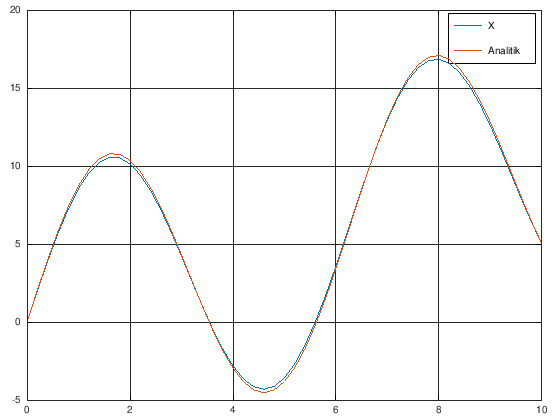

In [29]:
time = a:h:b;

plot(time, X)
hold on
plot(time, xSol(time))
grid on
legend ('X', 'Analitik')

## Bacaan Lain

* [Numerical Methods for Differential](http://faculty.olin.edu/bstorey/Notes/DiffEq.pdf)
* [Numerical Methods for Two–Point Boundary Value
Problems](https://pdfs.semanticscholar.org/74dd/cf24180279a6a78d8ffa95bcbb23567af51a.pdf)
* [Modules for Numerical Analysis](http://mathfaculty.fullerton.edu/mathews/n2003/NumericalUndergradMod.html)